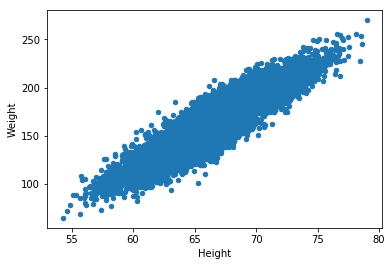

In [1]:
import pandas as pd
import matplotlib
%matplotlib inline
df = pd.read_csv('../shared-resources/heights_weights_genders.csv')
df.plot.scatter(x='Height', y='Weight')

In [2]:
from sklearn.linear_model import LinearRegression, LogisticRegression

In [7]:
X = df[['Height', 'Weight']].values
y = (df.Gender == 'Female').astype(int)

In [8]:
linearreg = LinearRegression(normalize=True)
linearreg = linearreg.fit(X, y)

In [9]:
linearreg.score(X, y)

0.64919062023668461

In [29]:
df['ypred_linear'] = linearreg.predict(X)
df['y'] = y
rmse = pd.np.sqrt(((df.ypred_linear - df.y) ** 2).mean())

0.29614581702402765

In [35]:
linearreg.score??


In [36]:
((df.ypred_linear - df.y) ** 2).mean()  # wrong mean accuracy

0.087702344940828861

In [17]:
proportion_female = y.sum() / len(df)
proportion_female


0.5

In [20]:
logreg = LogisticRegression(class_weight=
    {0: 1 - proportion_female, 1: proportion_female})
logreg = logreg.fit(X, y)

In [21]:
logreg.score(X, y)

0.91949999999999998

In [24]:
df['ypred'] = logreg.predict(X)
correct_pred = df.ypred == y
correct_pred.sum() / df.shape[0]


0.91949999999999998

In [ ]:
df['e_linear'] = df.ypred_linear - y

In [38]:
df['gender_int'] = (df.Gender == 'Female').astype(int)
X = df[['gender_int', 'Height']].values.astype(float)
y = df.Weight.values.reshape(-1, 1)
mvlr = LinearRegression(normalize=True)
mvlr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [41]:
mvlr.score(X, y)

0.90274817292200915

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f378bb97fd0>]], dtype=object)

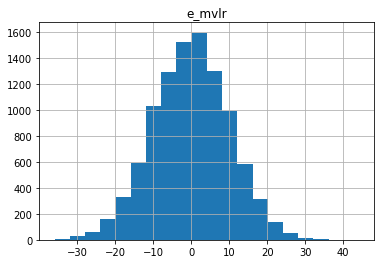

In [49]:
df['weightpred_mvlr'] = mvlr.predict(X)
df['e_mvlr'] = (df.weightpred_mvlr - df.Weight)
df[['e_mvlr']].hist(bins=20)

In [50]:
(df.e_mvlr ** 2).mean() ** .5 

10.012588345446908